In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
wcd = os.getcwd()
wcd

'/Users/luluashahmalak/Documents/FDA Internship'

In [3]:
df1 = pd.read_excel('/Users/luluashahmalak/Documents/FDA Internship/Inputs Refined - Updated.xlsx')

In [4]:
df1.head()

,Publications,108,Unnamed: 2,Unnamed: 3,needs updates
0,RSTs,27.0,NaN,NaN,NaN
1,Guidances,16.0,NaN,NaN,NaN
2,Standards,30.0,NaN,NaN,NaN
3,Communications,18.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [5]:
df = pd.read_excel('Inputs Refined - Updated.xlsx', 'Publications')

In [6]:
df.head()

,Publication Title,Reference,Link,Number of Unique Submissions,Unique Procodes,Program,Division,Source of Publication Title (Name of Scientist),Search Phrase/Keyword,PublishDate
0,In Vitro Leakage Testing of Tissue Containment...,"Alexander Herman, Nandini Duraiswamy, Poulomi...",In Vitro Leakage Testing of Tissue Containment...,NaN,NaN,Post Market Signal Responce,DAM,"Herman, Alexander",Bag integrity testing; Power morcellation; Pre...,2019-05-21
1,Mechanical and leakage integrity testing consi...,"Alexander Herman, Nandini Duraiswamy , Poulomi...",Mechanical and leakage integrity testing consi...,NaN,NaN,Post Market Signal Responce,DAM,"Herman, Alexander",NaN,2023-03-29
2,The importance of hemorheology and patient ana...,"Aycock, K. I, Campbell, R. L, Lynch, F. C, Man...",The Importance of Hemorheology and Patient Ana...,NaN,NaN,Credibility of Computational Models,DAM,Brent Craven,Blood viscosity; Computational fluid dynamics;...,2016-06-06
3,A CFD-based Kriging surrogate modeling approa...,"Craven BA, Aycock KI, Herbertson LH, Malinausk...",A CFD-based Kriging surrogate modeling approac...,NaN,NaN,Credibility of Computational Models,DAM,Brent Craven,Blood damage; Hemolysis; Kriging surrogate mod...,2019-02-27
4,Use of the FDA Nozzle Model to Illustrate Vali...,"Hariharan, P., D’Souza, G. A., Horner, M., Mor...",Use of the FDA nozzle model to illustrate vali...,NaN,NaN,Cardiovascular,DAM,Richard Malinauskas,NaN,2017-06-08


In [7]:
variable_names = df.columns
print(variable_names)

Index(['Publication Title', 'Reference ', 'Link',
       'Number of Unique Submissions', 'Unique Procodes', 'Program',
       'Division ', 'Source of Publication Title (Name of Scientist)',
       'Search Phrase/Keyword', 'PublishDate'],
      dtype='object')


## The amount of Publications according to each division.

In [8]:
df.loc[df['Division '] == 'DAM', 'Division '] = 'Division of Applied Mechanics'
df.loc[df['Division '] == 'DBP', 'Division '] = 'Division of Biomedical Physics'
df.loc[df['Division '] == 'DIDSR', 'Division '] = 'Division of Imaging, Diagnostics, and Software Reliability'
df.loc[df['Division '] == 'DBCMS', 'Division '] = 'Division of Biology, Chemistry, and Materials Science'

In [9]:
publication_counts = df['Publication Title'].value_counts()

In [10]:
division_counts = df['Division '].value_counts().to_frame().reset_index()
division_counts.columns = ['Division ', 'Publication Count']
print(division_counts)

                                           Division   Publication Count
0                     Division of Biomedical Physics                 44
1  Division of Imaging, Diagnostics, and Software...                 26
2                      Division of Applied Mechanics                 25
3  Division of Biology, Chemistry, and Materials ...                 13


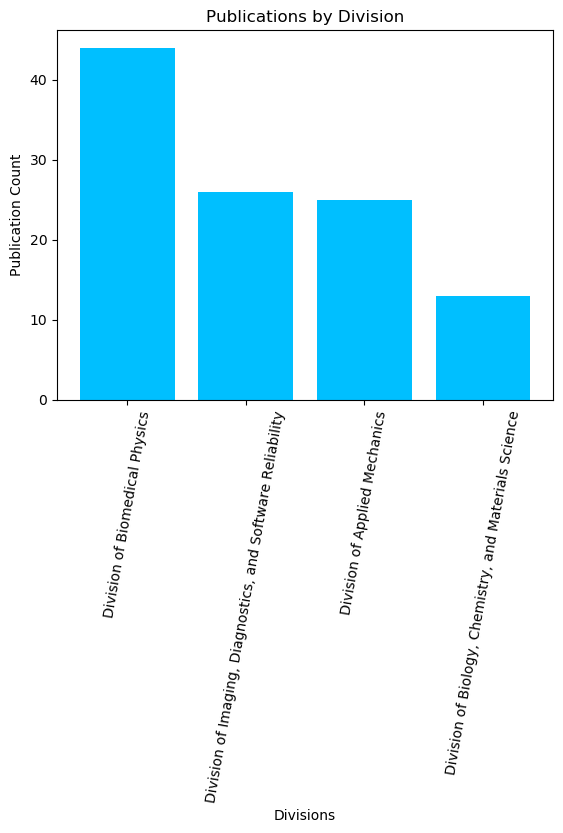

In [11]:
division_counts = df['Division '].value_counts()

plt.bar(division_counts.index, division_counts.values, color='#00BFFF')
plt.xlabel('Divisions')
plt.ylabel('Publication Count')
plt.title('Publications by Division')
plt.xticks(rotation=80)
plt.show()

## The amount of publications according to programs

In [14]:
# ensure that the information associated with 'Credibility of Computational Models' is now grouped under 'Credibility in Computational Modeling'
df['Program'] = df['Program'].replace('Credibility of Computational Models', 'Credibility in Computational Modeling')

In [19]:
df['Program'] = df['Program'].replace('MID', 'Digital Pathology, MID')

In [25]:
df['Program'] = df['Program'].replace('AI/ML', 'Digital Pathology, AI/ML')

In [23]:
df['Program'] = df['Program'].replace('Ophthalmology', 'Ophthalmology, Electromagnetic and Electrical Safety')

In [27]:
# Sort the dataset by the 'Program' column
df_sorted = df.sort_values('Program')

# Create the bar plot with sorted data
fig = px.bar(df_sorted, x='Division ', y= publication_counts , color='Program', title='Publications by Division and Program',
             labels={'Division ': 'Divisions', 'publication_counts': 'Publication Count', 'Program': 'Program'},
             hover_data=['Program'])

fig.update_yaxes(title='Publication Count')

fig.show() 